# Data exploration of all years 2006-2022

Made by: Elsa Kidman


In [ ]:
import json
# Import the file of all data from 2006-2022 with topics
f = open('data/data_all/data_all_topic_final.json')
data_init = json.load(f)


In [ ]:
# Catch empty parties
empty_party_q =[]
empty_party_a =[]

for entry in data_init:
  p_q = entry['undertecknare_partibet']
  p_a = entry['besvaradav_partibet']
  if len(p_q) == 0:
    empty_party_q.append(entry)
  if len(p_a) == 0:
    empty_party_a.append(entry)

print(f"Empty party for who asked: {len(empty_party_q)}")
print(f"Empty party for who answered: {len(empty_party_a)}")

Empty party for who asked: 0
Empty party for who answered: 41


In [ ]:
# Catch empty people
empty_person_q =[]
empty_person_a =[]

for entry in data_init:
  p_q = entry['undertecknare_name']
  p_a = entry['besvaradav_name']
  if len(p_q) == 0:
    empty_person_q.append(entry)
  if len(p_a) == 0:
    empty_person_a.append(entry)

print(f"Empty person, asked: {len(empty_person_q)} answered: {len(empty_person_a)}")

Empty person, asked: 0 answered: 0


In [ ]:
# Catch empty questions or answers
empty_q =[]
empty_a =[]

for entry in data_init:
  question = entry['question']
  answer = entry['answer']
  if len(question) == 0:
    empty_q.append(entry)
  if len(answer) == 0:
    empty_a.append(entry)

print(f"Empty question: {len(empty_q)}, answer: {len(empty_a)}")

Empty question: 0, answer: 134


In [ ]:
import pandas as pd

# Create a dataframe of the data and preform some preprocessing to the data
df = pd.DataFrame(data_init)

# Convert the date column to date format
df['question_date'] = pd.to_datetime(df['question_date'])

# Make sure to replace empty lists of answers with empty strings instead
def replace_empty_answers(lst):
    return '' if len(lst) == 0 else lst

df['top_10_words_answer'] = df['top_10_words_answer'].apply(replace_empty_answers)

# The FP party changed name to L, it's the same party therefore I can change the name.
df.loc[df['undertecknare_partibet'] == 'FP', 'undertecknare_partibet'] = 'L'
df.loc[df['besvaradav_partibet'] == 'FP', 'besvaradav_partibet'] = 'L'

df.head()

,id_,question,question_date,answer,undertecknare_name,undertecknare_partibet,besvaradav_name,besvaradav_partibet,regering,id_topic_combined,top_10_words_combined,id_topic_question,top_10_words_question,id_topic_answer,top_10_words_answer
0,gx11839,\nden \r\n27 maj\nFråga \n2009/10:839 \r\nÖkat...,2010-05-27,\nden 2 juni\nSvar på fråga\n2009/10:839 Ökat ...,Karin Svensson Smith,MP,Åsa Torstensson,C,48.0,72,"cykling, motorcyklister, cyklister, elsparkcyk...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö..."
1,gx11838,\nden \r\n26 maj\nFråga \n2009/10:838 \r\nFrys...,2010-05-26,\nden \r\n3 juni\nSvar på fråga\n2009/10:838 F...,Birgitta Eriksson,S,Beatrice Ask,M,48.0,4,"bankerna, finansiella, banker, finansinspektio...",94,"tullverket, brottslighet, stöldgods, brottsnät...",94,"tullverket, brottslighet, stöldgods, brottsnät..."
2,gx11837,\nden \r\n25 maj\nFråga \n2009/10:837 \r\nSver...,2010-05-25,\nden 4 juni\nSvar på fråga\n2009/10:837 Sveri...,Ameer Sachet,S,Ewa Björling,M,48.0,194,"epa, ceta, förhandlingarna, avs, avtalet, avs ...",148,"ceta, epa, förhandlingarna, avs, handelsavtal,...",4,"etiopien, västsahara, somaliland, somalia, fn,..."
3,gx11836,\nden \r\n25 maj\nFråga \n2009/10:836 \r\nSJ o...,2010-05-25,\nden 1 juni\nSvar på fråga\n2009/10:836 SJ oc...,Ameer Sachet,S,Maud Olofsson,C,48.0,0,"trafikverket, sj, eneroth, tomas eneroth, toma...",81,"tågtrafiken, trafikverket, tåg, elmsäter, cath...",282,"sj, sj ab, ab, tåg, resenärer, tågtrafik, bilj..."
4,gx11835,\nden \r\n24 maj\nFråga \n2009/10:835 \r\nAvrä...,2010-05-24,\nden 10 juni\nSvar på fråga\n2009/10:835 Avrä...,Helena Bargholtz,L,Carl Bildt,M,48.0,17,"iran, iranska, mänskliga, rättigheter, mänskli...",20,"iran, iranska, mänskliga, irans, rättigheter, ...",20,"iran, iranska, mänskliga, irans, rättigheter, ..."


In [ ]:
# Divide the data by year
grouped_by_year = df.groupby(df['question_date'].dt.year)
years = []
dfs_by_year = {}
data_years = []

for year, group_df in grouped_by_year:
  data_years.append(group_df)
  dfs_by_year[year] = group_df
  years.append(year)

# Divide data by elections, four year intervalls
election_interval = [ ["2006-09-18","2010-09-19"],
                    ["2010-09-20","2014-09-14"],
                    ["2014-09-15","2018-09-09"],
                    ["2018-09-10","2022-10-18"] ]

data_elections = []
data_elections_len = []
for election_period in election_interval:
  start = pd.to_datetime(election_period[0])
  end = pd.to_datetime(election_period[1])
  result = df[(start <= df['question_date']) & (df['question_date'] <= end)]
  result = result.sort_values(by='question_date', ascending=True).reset_index(drop=True)
  data_elections.append(result)
  data_elections_len.append(len(result))

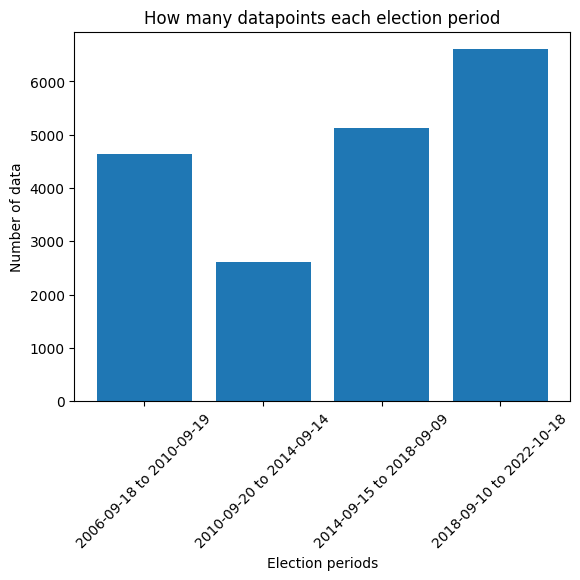

In [ ]:
import matplotlib.pyplot as plt
election_period_lst = ["2006-09-18 to 2010-09-19", "2010-09-20 to 2014-09-14", "2014-09-15 to 2018-09-09", "2018-09-10 to 2022-10-18"]
# Plot how many data entries throughout the years
count = []

for data in data_elections:
  count.append(len(data))

plt.bar(election_period_lst, count)
plt.xticks(election_period_lst, rotation=45)
plt.xlabel('Election periods')
plt.ylabel("Number of data")
plt.title('How many datapoints each election period')

plt.show()

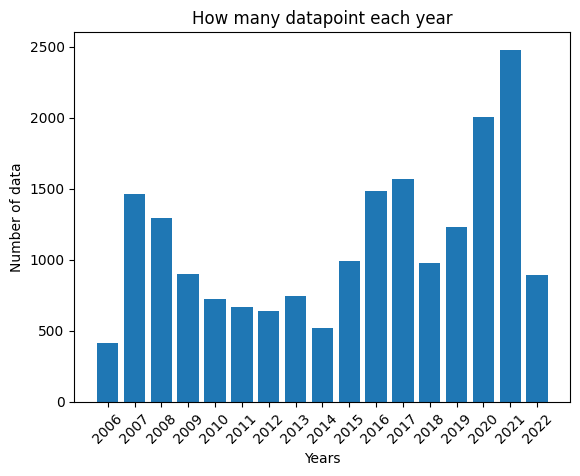

In [ ]:
# Plot how many data entries throughout the years
count = []

for data in data_years:
  count.append(len(data))

plt.bar(years, count)
plt.xticks(years, rotation=45)
plt.xlabel('Years')
plt.ylabel("Number of data")
plt.title('How many datapoints each year')

plt.show()

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def get_question_answer_lengths(data):
  questions_length = []
  answers_length = []

  for index, entry in data.iterrows():
    question = entry['question']
    answer = entry['answer']

    # Tokenize the text and Lowercase
    words_question = word_tokenize(question, language='swedish')
    words_question = [word.lower() for word in words_question]
    # Tokenize the text and Lowercase
    words_answer = word_tokenize(answer, language='swedish')
    words_answer = [word.lower() for word in words_answer]

    # Length
    questions_length.append(len(words_question))
    answers_length.append(len(words_answer))

  return questions_length, answers_length

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
questions_length_years = []
answers_length_years = []

for data in data_years:
  questions_length, answers_length = get_question_answer_lengths(data)
  questions_length_years.append(questions_length)
  answers_length_years.append(answers_length)

questions_length_elections = []
answers_length_elections = []

for data in data_elections:
  questions_length, answers_length = get_question_answer_lengths(data)
  questions_length_elections.append(questions_length)
  answers_length_elections.append(answers_length)

In [ ]:
len(questions_length_elections[0])

4638

### Word count of questions and answers trough election periods

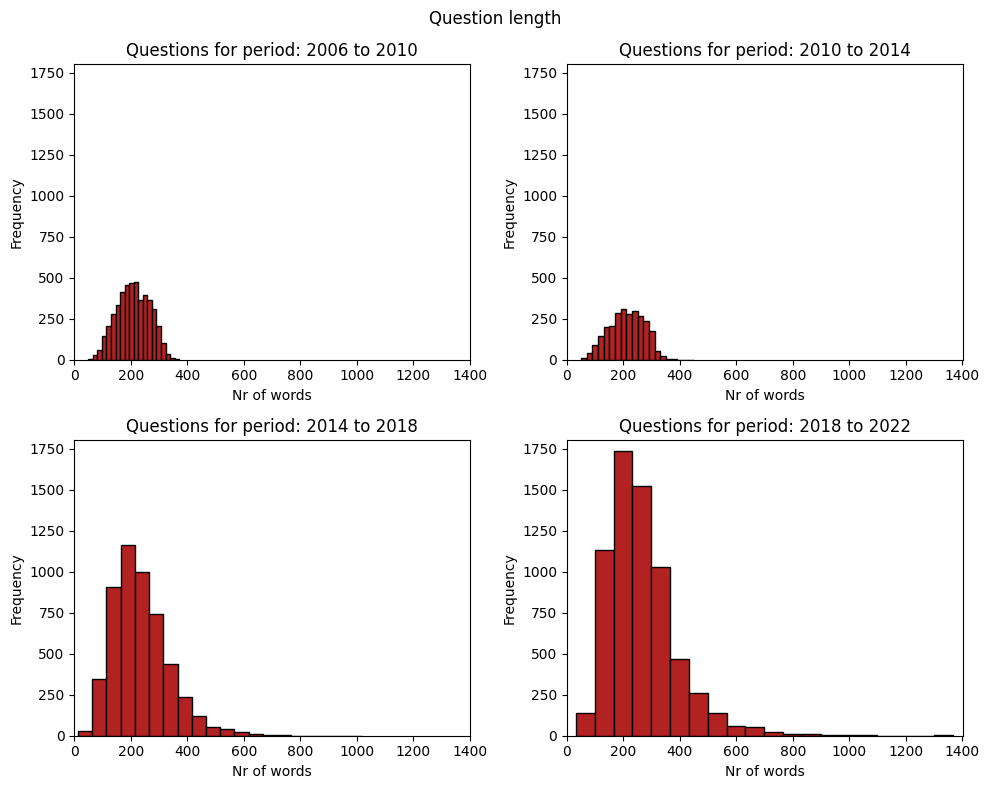

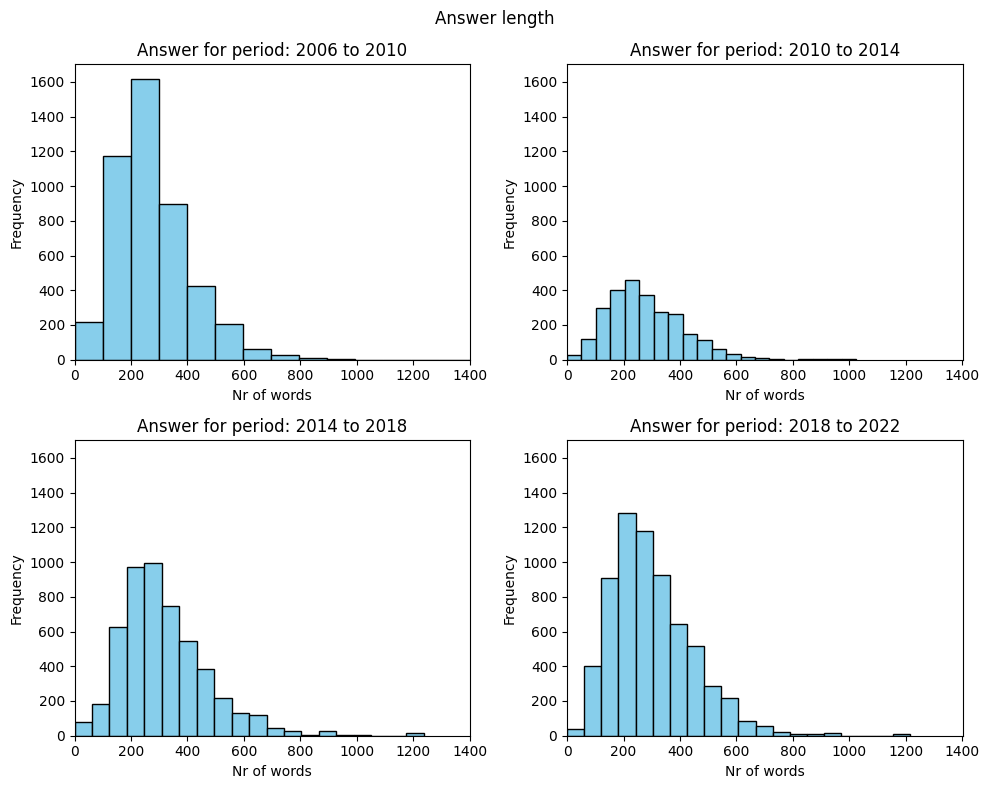

In [ ]:
import matplotlib.pyplot as plt

election_interval_name = [ "2006 to 2010", "2010 to 2014", "2014 to 2018", "2018 to 2022"]

# For questions
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, questions_length in enumerate(questions_length_elections):

  axs[i].hist(questions_length, bins=20, edgecolor='black',  color='firebrick')
  axs[i].set_title(f'Questions for period: {election_interval_name[i]}')
  axs[i].set_xlim(0, 1401)
  axs[i].set_ylim(0, 1801)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')


fig.suptitle('Question length')
plt.tight_layout()
plt.show()

# For answers
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, answers_length in enumerate(answers_length_elections):

  axs[i].hist(answers_length, bins=20, edgecolor='black',  color='skyblue')
  axs[i].set_title(f'Answer for period: {election_interval_name[i]}')
  axs[i].set_xlim(0, 1401)
  axs[i].set_ylim(0, 1701)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')

fig.suptitle('Answer length')
plt.tight_layout()
plt.show()

## How many people from each party that has answered and asked questions

In [ ]:
# Gets the count of questions and answers made by each party
def get_parties_count(data):
  parties_questions_count = {'S':0, 'V':0, 'MP':0, 'C':0, 'L':0, 'M':0, 'KD':0, 'SD':0, '-': 0}
  parties_answers_count = {'S':0, 'V':0, 'MP':0, 'C':0, 'L':0, 'M':0, 'KD':0, 'SD':0, '-': 0}

  for index, entry in data.iterrows():
    party_question = entry['undertecknare_partibet']
    party_answer = entry['besvaradav_partibet']
    parties_questions_count[party_question] += 1
    if len(party_answer) != 0:
      parties_answers_count[party_answer] += 1

  return parties_questions_count, parties_answers_count

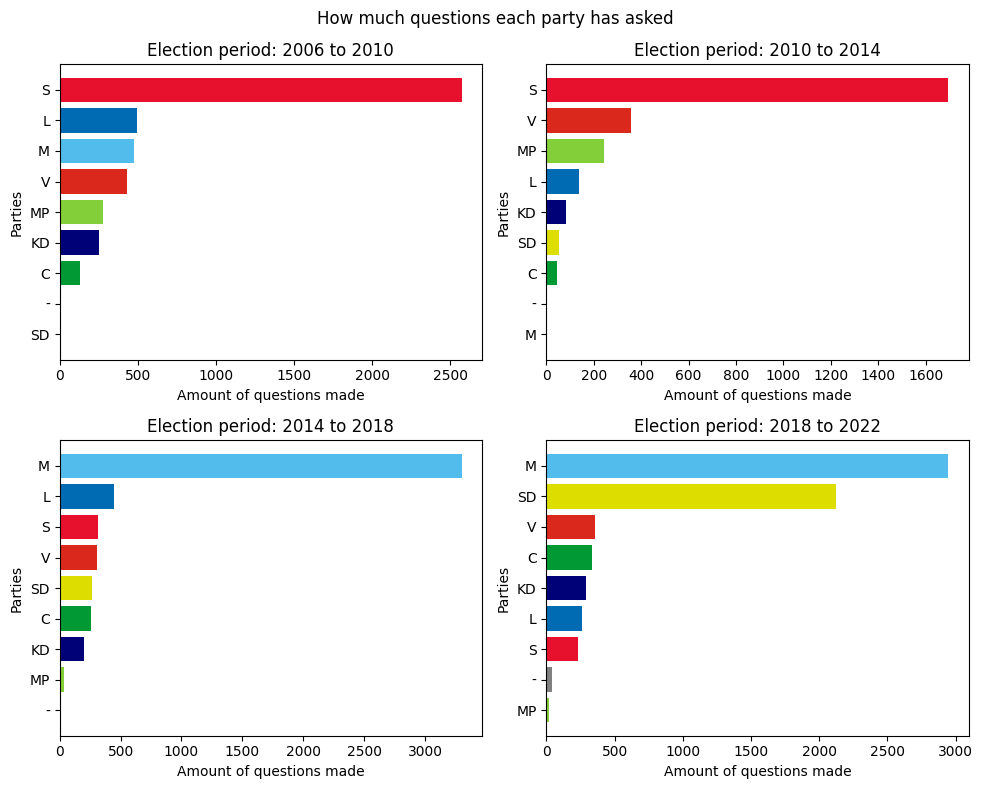

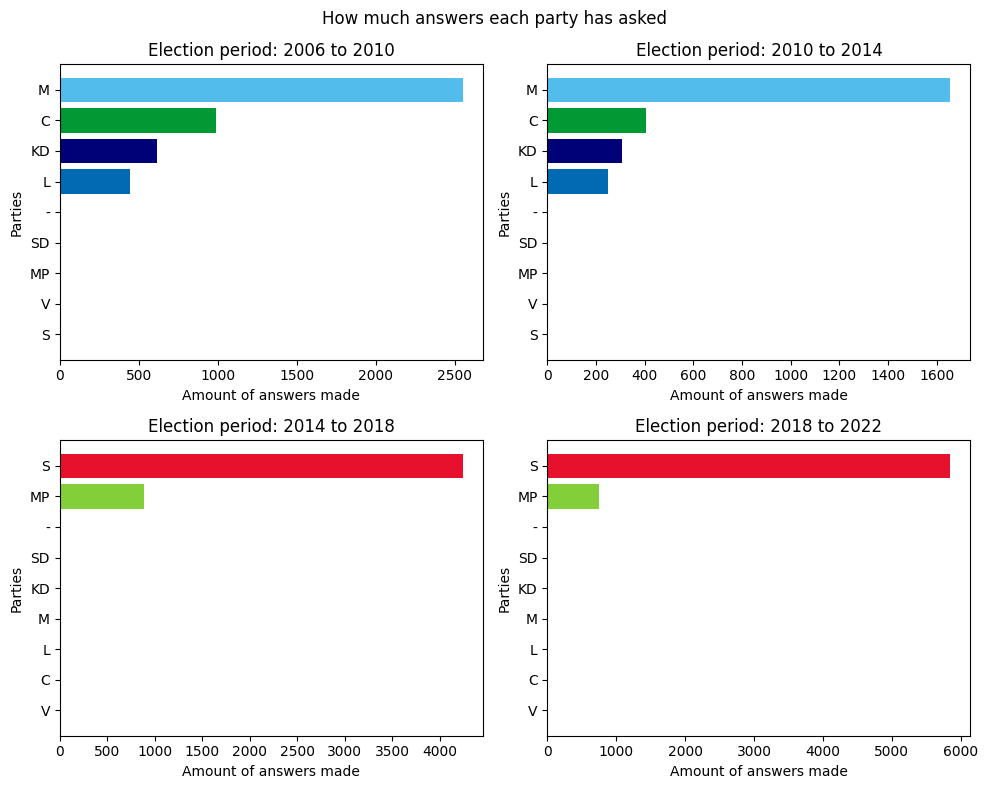

In [ ]:
# Signature colors for the different parties.
party_color = {'S':"#E8112d", 'V':"#DA291C", 'MP':"#83CF39", 'C':"#009933", 'L': "#006AB3", 'M':"#52BDEC", 'KD':"#000077", 'SD': "#DDDD00", '-': "gray"}

# Get the count of how many questions each party has made during the different election periods
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, data in enumerate(data_elections):
  parties_questions_count, parties_answers_count = get_parties_count(data)

  sorted_parties_q = sorted(parties_questions_count.items(), key=lambda x: x[1], reverse=False)
  parties, party_questions = zip(*sorted_parties_q)
  axs[i].barh(parties, party_questions, color=[party_color[party] for party in parties])
  axs[i].set_xlabel('Amount of questions made')
  axs[i].set_ylabel("Parties")
  axs[i].set_title(f'Election period: {election_interval_name[i]}')

fig.suptitle('How much questions each party has asked')
plt.tight_layout()
plt.show()


# Get the count of how much each party has answered questions during the different election periods
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, data in enumerate(data_elections):
  parties_questions_count, parties_answers_count = get_parties_count(data)

  sorted_parties_a = sorted(parties_answers_count.items(), key=lambda x: x[1], reverse=False)
  parties, party_answers = zip(*sorted_parties_a)
  axs[i].barh(parties, party_answers, color=[party_color[party] for party in parties])
  axs[i].set_xlabel('Amount of answers made')
  axs[i].set_ylabel("Parties")
  axs[i].set_title(f'Election period: {election_interval_name[i]}')

fig.suptitle('How much answers each party has asked')
plt.tight_layout()
plt.show()

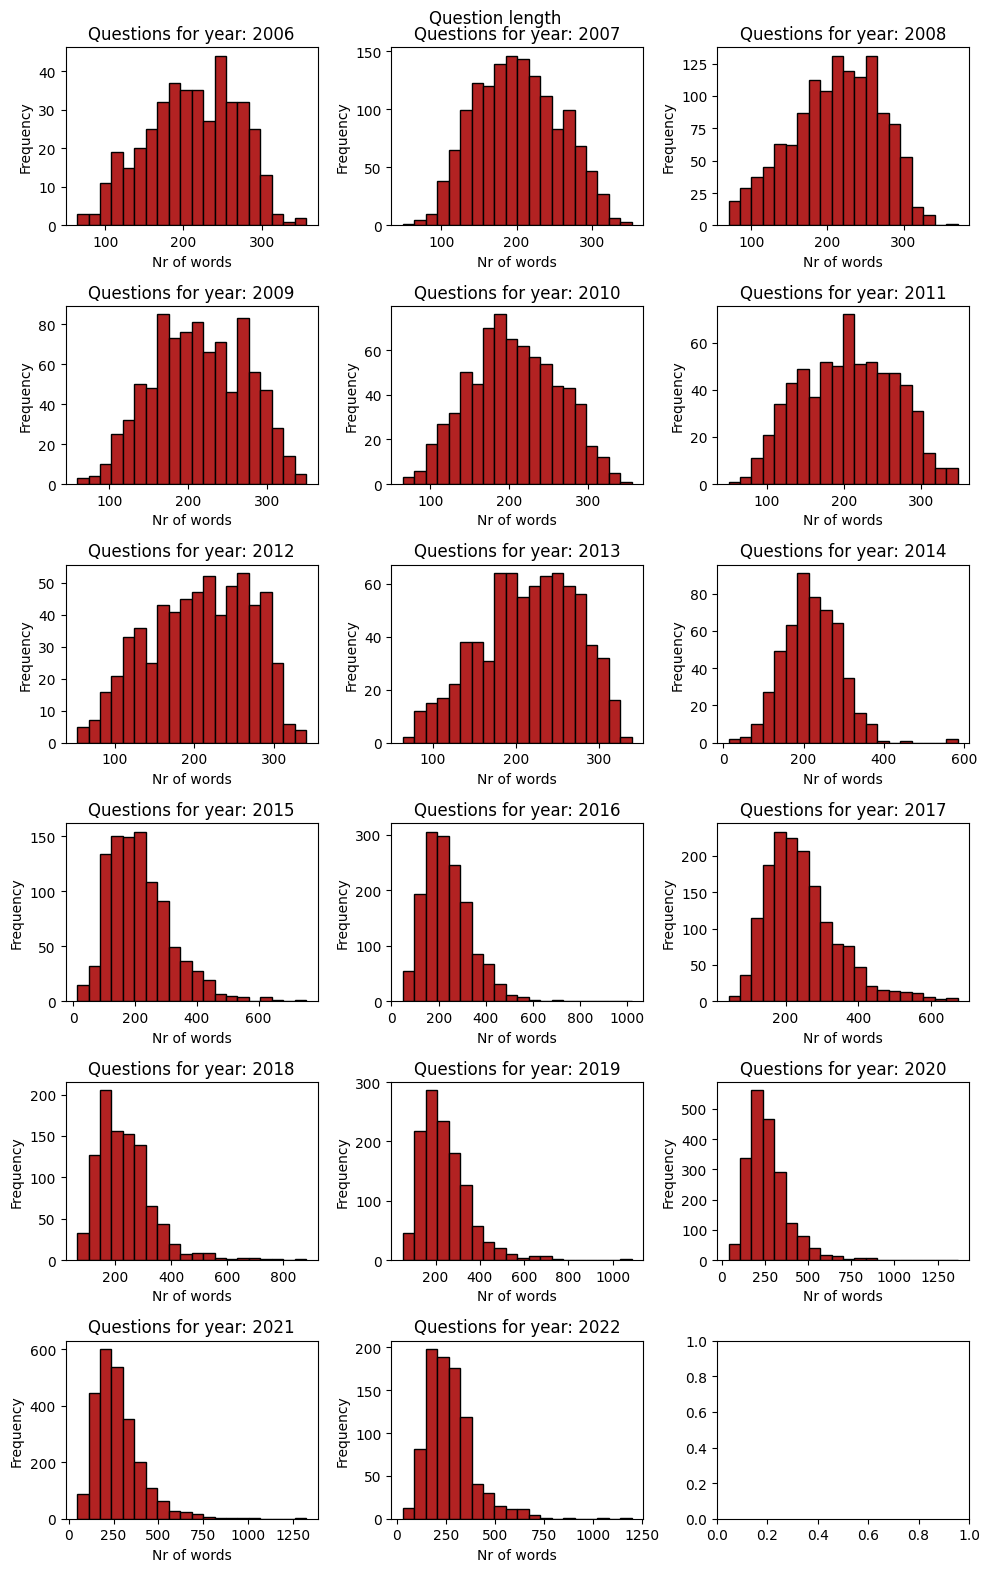

In [ ]:

# For questions
fig, axs = plt.subplots(6, 3, figsize=(10, 16))
axs = axs.flatten()

for i, questions_length in enumerate(questions_length_years):

  axs[i].hist(questions_length, bins=20, edgecolor='black',  color='firebrick')
  axs[i].set_title(f'Questions for year: {years[i]}')
  #axs[i].set_xlim(0, 1401)
  #axs[i].set_ylim(0, 1801)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')


fig.suptitle('Question length')
plt.tight_layout()
plt.show()


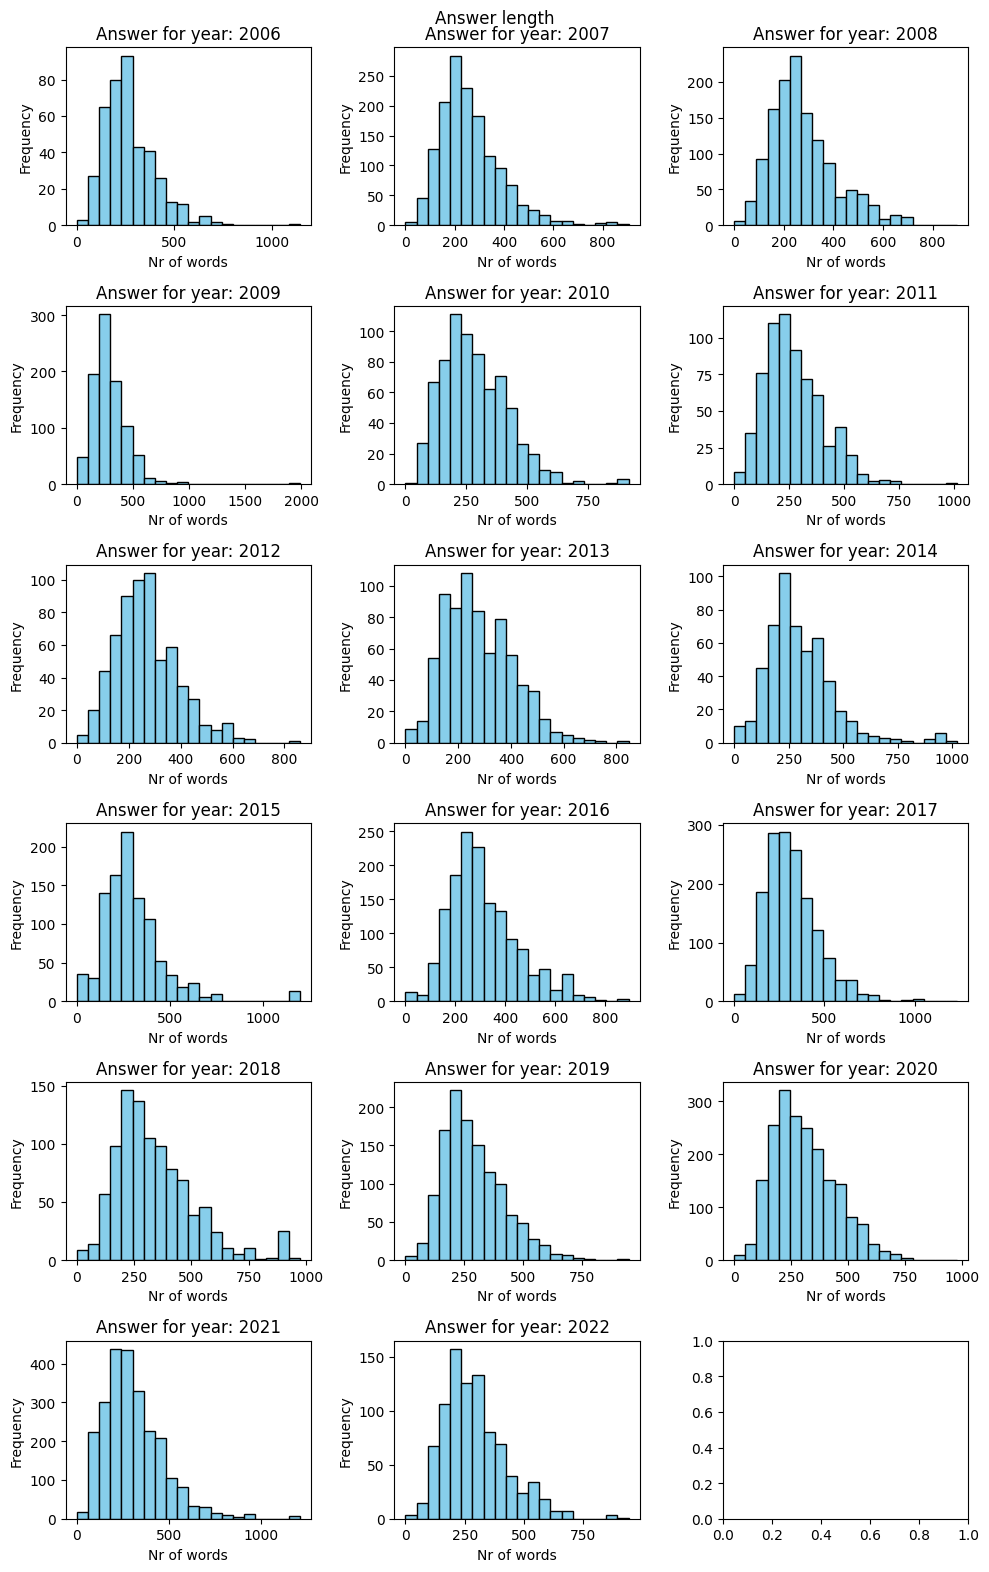

In [ ]:
# For answers
fig, axs = plt.subplots(6, 3, figsize=(10, 16))
axs = axs.flatten()

for i, answers_length in enumerate(answers_length_years):

  axs[i].hist(answers_length, bins=20, edgecolor='black',  color='skyblue')
  axs[i].set_title(f'Answer for year: {years[i]}')
  #axs[i].set_xlim(0, 1401)
  #axs[i].set_ylim(0, 1701)
  axs[i].set_xlabel('Nr of words')
  axs[i].set_ylabel('Frequency')

fig.suptitle('Answer length')
plt.tight_layout()
plt.show()

In [ ]:
# Example of entries throughout the elections

print(data_elections[0].iloc[20]['question'])


den 
13 oktober
Fråga 
2006/07:21 Finansministerns ansvar för höga 
institutionshyror
av Sonia Karlsson (s)
till finansminister Anders Borg (m)
I sin första intervju som 
kulturminister sade Cecilia Stegö Chilò att hon tänker ta itu med ”problemet 
med alltför höga institutionshyror som främst drabbar Stockholm”. 
Vilka åtgärder avser 
finansministern att vidta för att kulturministerns löfte ska uppfyllas?



In [ ]:
print(data_elections[1].iloc[20]['question'])


den 
27 oktober
Fråga 
2010/11:25 
Säker vinterkörning
av Lars Gustafsson 
(KD)
till statsrådet Catharina Elmsäter-Svärd (M)
Efter att ha konstaterat otillfredsställande 
resultat i bekämpningen av hälsofarliga partiklar i stadsmiljö, inriktar sig 
Trafikverket på att minska användningen av dubbdäck. Partikelutsläppen i 
stadsmiljö har till följd av trängselskatter och sänkta hastighetsgränser 
minskat. 
Trafikverket har nyligen i en studie utförd av Väg- och transportforskningsinstitutet konstaterat 
dubbdäckens fördelar för trafiksäkerheten under vinterväglag. I större delen av 
Sverige bjuder väderleken någon gång under vintern på förhållanden där dubbdäck 
är nödvändiga för en säker trafikvistelse. Enligt Trafikverkets studie minskar 
risken för dödsolyckor med 42 procent om man använder dubbdäck jämfört med 
dubbfria vinterdäck. Trots det arbetar Trafikverket för att de större städerna 
i Mellansverige ska avråda eller – i likhet med i Stockholm – 
förbjuda användandet av dubbdäc

In [ ]:
print(data_elections[2].iloc[10]['question'])

av Anette Åkesson (M)
till Statsminister Stefan Löfven (S)
 
För att klara den långsiktiga finansieringen av den svenska välfärden har det i olika utredningar och rapporter nämnts flera alternativ som är mer eller mindre kontroversiella. Ökad privat finansiering, begränsningar av det offentliga åtagandet, ökad invandring och skattehöjning hör till de mer kontroversiella.
Till de mindre kontroversiella åtgärderna hör att öka antalet arbetade timmar samt att öka effektiviteten i verksamheterna. Detta är åtgärder som i princip alla ställer sig bakom, från vänster till höger. Och det är just i den riktningen som alliansregeringen konsekvent har arbetat under åtta år.
Alliansen har genomfört reformer för att stärka Sverige långsiktigt i arbetslinjens namn med framför allt jobbskatteavdrag och socialförsäkringsreformer men även genom sänkta arbetsgivaravgifter för unga och äldre. Sverige rustades för 2020-talet. Det har delvis varit tuffa reformer men det har gett just de effekter som var av

In [ ]:
print(data_elections[3].iloc[10]['question'])

av Sten Bergheden (M)
till Statsrådet Jennie Nilsson (S)
 
Sveriges riksdag har tagit beslut om att ställa sig bakom en vargstam på 170–270 vargar, men i dag är vargstammen betydligt större, vilket skapar enorma problem för landsbygden. Dessutom är vargstammen begränsad till Mellansverige, vilket gör att påfrestningarna där blir ännu större. 
Sveriges riksdag har också ställt sig bakom ett beslut i livsmedelsstrategin som säger att vi ska öka livsmedelsproduktionen i Sverige, men en för stor vargstam äventyrar även detta mål.
En för stor vargstam förstör för både jägare, djuruppfödare och hundägare och minskar möjligheterna att kunna leva och bo på landsbygden.
Vargstammen är för stor i dag, och skadorna är enorma för de drabbade djurägarna.
Med anledning av detta vill jag fråga statsrådet Jennie Nilsson:
 
Vad avser statsrådet att göra för att minska antalet vargar till 170–270 vargar och därmed följa riksdagens beslut? 


From these questions from different election periods we can see that the questions structure has changed throughout the elections.